In [1]:
# import libraries

from __future__ import print_function
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import zscore
import seaborn as sns
import sys,os
import warnings

# suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# define directories

root_dir = "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/"
tmp_dir = "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/annotations/"

In [3]:
# create variables for inhibitor classes according to drug targets
# use the drugs having binary response information in GDSC   

EGFRi_drugs = ['Erlotinib',
               'Lapatinib',
               'CP724714',
               'EKB-569',
               'Gefitinib',
               'Afatinib',
               'Cetuximab',
               'HG-5-88-01']

DNA_REPi_drugs = ["Pyrimethamine",
                  "Doxorubicin",
                  "Etoposide",
                  "Gemcitabine",
                  "Mitomycin C",
                  "5-Fluorouracil",
                  "Bleomycin",
                  "Camptothecin",
                  "Cisplatin",
                  "Cytarabine",
                  "Methotrexate",
                  "Temozolomide",
                  "SN-38"]

CYTOi_drugs = ['Paclitaxel',
               'GSK269962A',
               'Vinorelbine',
               'PF-562271',
               'IPA-3',
               'Epothilone B',
               'GSK429286A',
               'Y-39983',
               'Vinblastine',
               'Docetaxel',
               'EHT 1864']

MITOSISi_drugs = ['VX-680',
                  'S-Trityl-L-cysteine',
                  'BI-2536',
                  'GW843682X',
                  'SB-715992',
                  'Genentech Cpd 10',
                  'GSK1070916',
                  'NPK76-II-72-1',
                  'MPS-1-IN-1',
                  'ZM-447439']

# 1. Continous and binary responses in GDSC 

## 1.1. EGFRi drugs 

In [5]:
# EGFRi drugs

drugs = list(set(EGFRi_drugs))
dfs_EGFRi = []
for drug in drugs:
    try:
        df = pd.read_csv(tmp_dir+"GDSC_response."+drug+".tsv",sep = "\t")
        dfs_EGFRi.append(df)
    except:
        print(drug, "not found in GDSC", file = sys.stderr)
dfs_EGFRi = pd.concat(dfs_EGFRi)
dfs_EGFRi.loc[:,"logIC50"] = dfs_EGFRi["logIC50"].apply(np.float64)
dfs_EGFRi.head()

,sample_name,response,logIC50,drug
0,683665,R,1.490015,Afatinib
1,683667,R,1.868376,Afatinib
2,684057,R,0.463011,Afatinib
3,684059,R,1.019383,Afatinib
4,684062,R,1.236020,Afatinib


<Axes: xlabel='drug', ylabel='logIC50'>

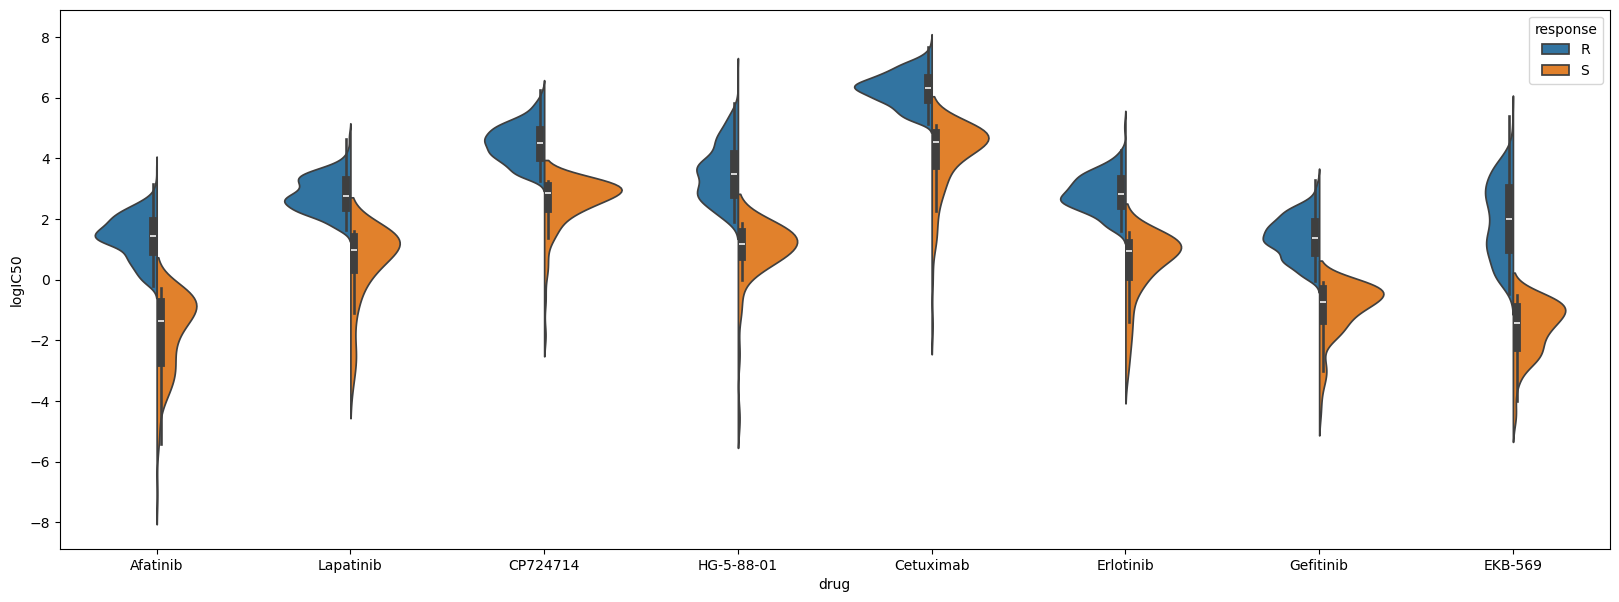

In [6]:
# plot distribution of resistant and sensitive samples (EGFRi)

dfs_EGFRi = dfs_EGFRi.reset_index(drop=True)
plt.figure(figsize=(20,7))
sns.violinplot(x="drug", y="logIC50", hue="response",data=dfs_EGFRi,split=True)

<Axes: xlabel='drug', ylabel='logIC50'>

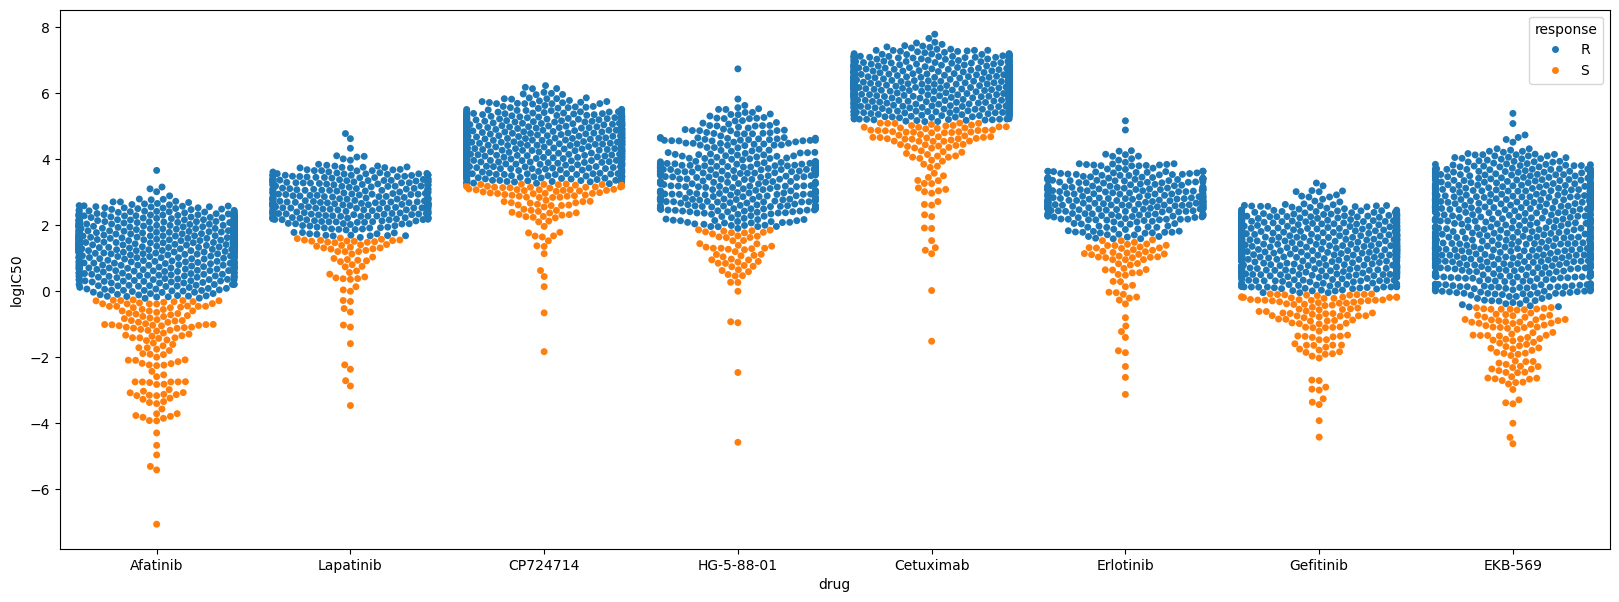

In [7]:
# plot distribution of resistant and sensitive samples (EGFRi)

plt.figure(figsize=(20,7))
sns.swarmplot(x="drug", y="logIC50", hue="response",data=dfs_EGFRi)

## 1.2. MITOSISi drugs 

In [8]:
# MITOSISi drugs

drugs = list(set(MITOSISi_drugs))
dfs_MITOSISi = []
for drug in drugs:
    try:
        df = pd.read_csv(tmp_dir+"GDSC_response."+drug+".tsv",sep = "\t")
        dfs_MITOSISi.append(df)
    except:
        print(drug, "not found in GDSC", file = sys.stderr)
dfs_MITOSISi = pd.concat(dfs_MITOSISi)
dfs_MITOSISi.loc[:,"logIC50"] = dfs_MITOSISi["logIC50"].apply(np.float64)
dfs_MITOSISi.head()

,sample_name,response,logIC50,drug
0,683665,R,-1.862192,BI-2536
1,684055,R,0.263453,BI-2536
2,684057,R,0.916035,BI-2536
3,684059,R,0.277831,BI-2536
4,684062,R,1.850177,BI-2536


<Axes: xlabel='drug', ylabel='logIC50'>

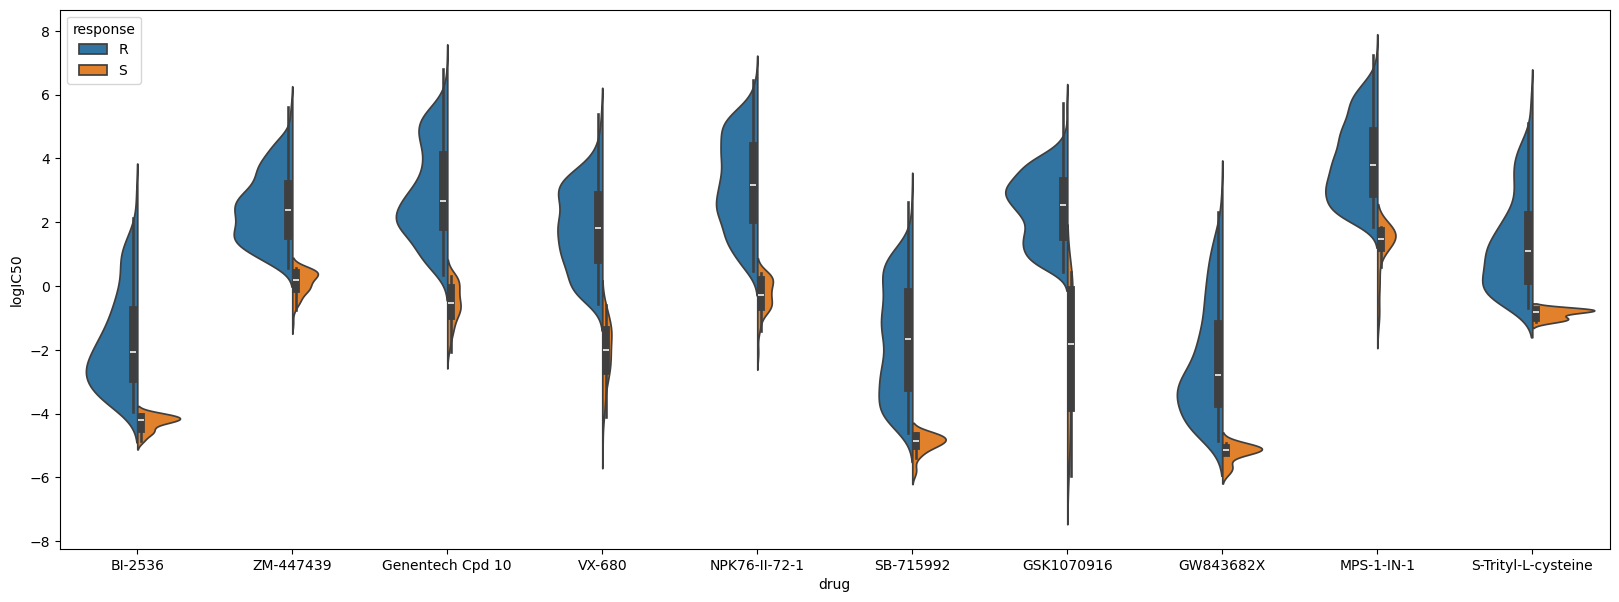

In [9]:
# plot distribution of resistant and sensitive samples (MITOSISi)

dfs_MITOSISi = dfs_MITOSISi.reset_index(drop=True)
plt.figure(figsize=(20,7))
sns.violinplot(x="drug", y="logIC50", hue="response",data=dfs_MITOSISi,split=True)

<Axes: xlabel='drug', ylabel='logIC50'>

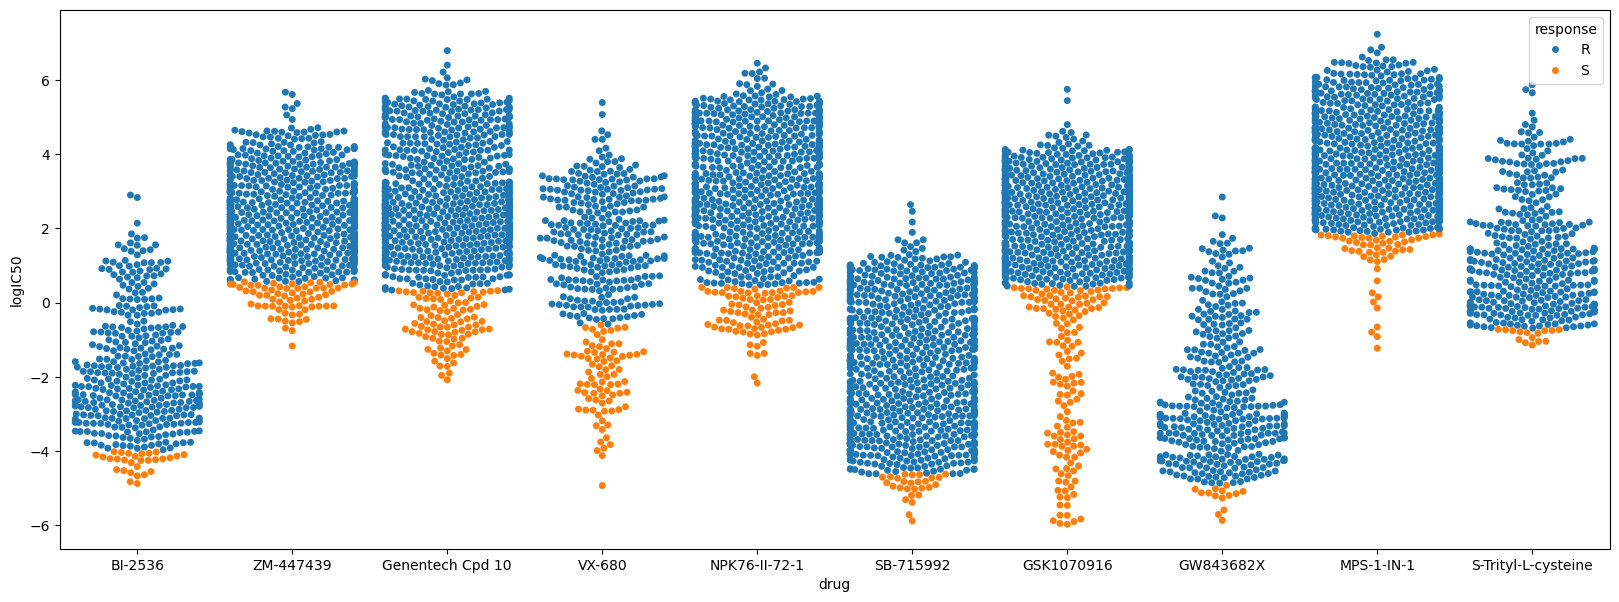

In [10]:
# plot distribution of resistant and sensitive samples (MITOSISi)

plt.figure(figsize=(20,7))
sns.swarmplot(x="drug", y="logIC50", hue="response",data=dfs_MITOSISi)

## 1.3. CYTOi drugs 

In [11]:
# CYTOi drugs

drugs = list(set(CYTOi_drugs))
dfs_CYTOi = []
for drug in drugs:
    try:
        df = pd.read_csv(tmp_dir+"GDSC_response."+drug+".tsv",sep = "\t")
        dfs_CYTOi.append(df)
    except:
        print(drug, "not found in GDSC", file = sys.stderr)
dfs_CYTOi = pd.concat(dfs_CYTOi)
dfs_CYTOi.loc[:,"logIC50"] = dfs_CYTOi["logIC50"].apply(np.float64)
dfs_CYTOi.head()

,sample_name,response,logIC50,drug
0,683665,R,-4.544286,Vinorelbine
1,683667,R,-4.202694,Vinorelbine
2,684052,R,-4.842541,Vinorelbine
3,684055,R,-4.037407,Vinorelbine
4,684057,R,-3.565445,Vinorelbine


<Axes: xlabel='drug', ylabel='logIC50'>

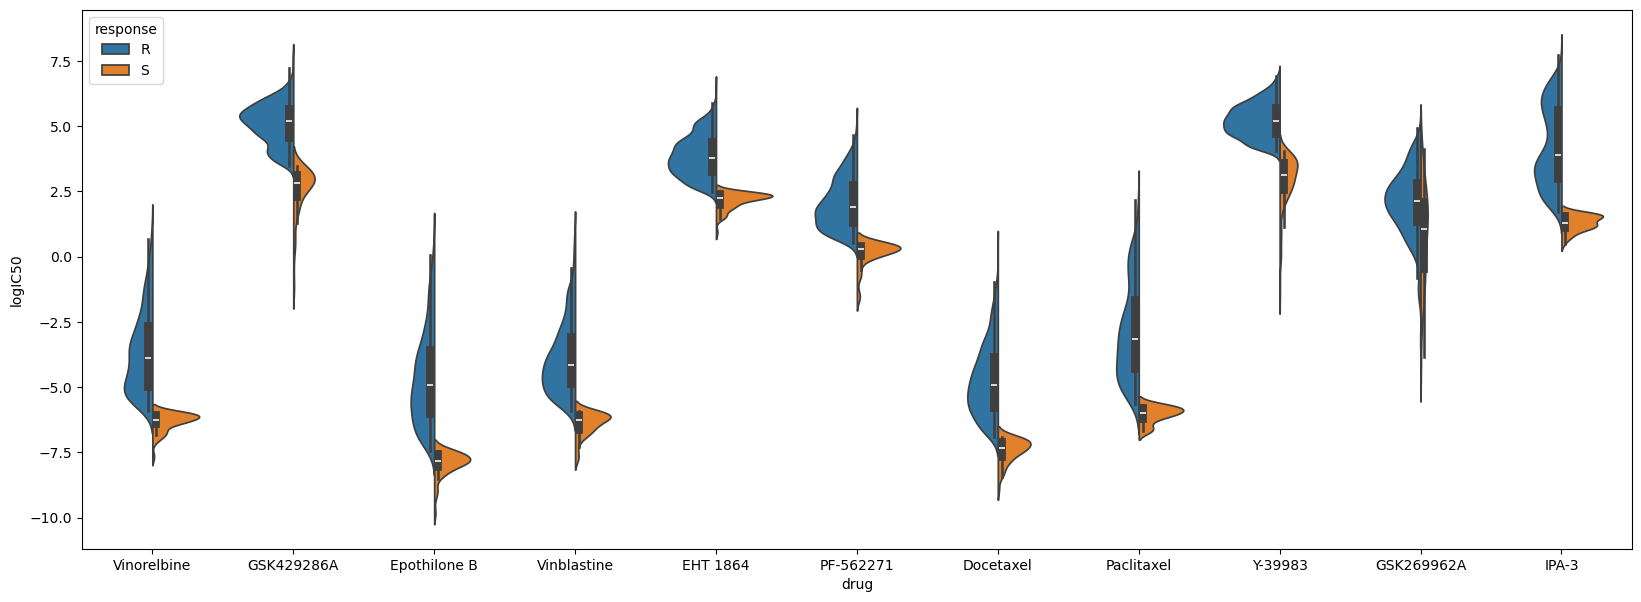

In [12]:
# plot distribution of resistant and sensitive samples (CYTOi)

dfs_CYTOi = dfs_CYTOi.reset_index(drop=True)
plt.figure(figsize=(20,7))
sns.violinplot(x="drug", y="logIC50", hue="response",data=dfs_CYTOi,split=True)

<Axes: xlabel='drug', ylabel='logIC50'>

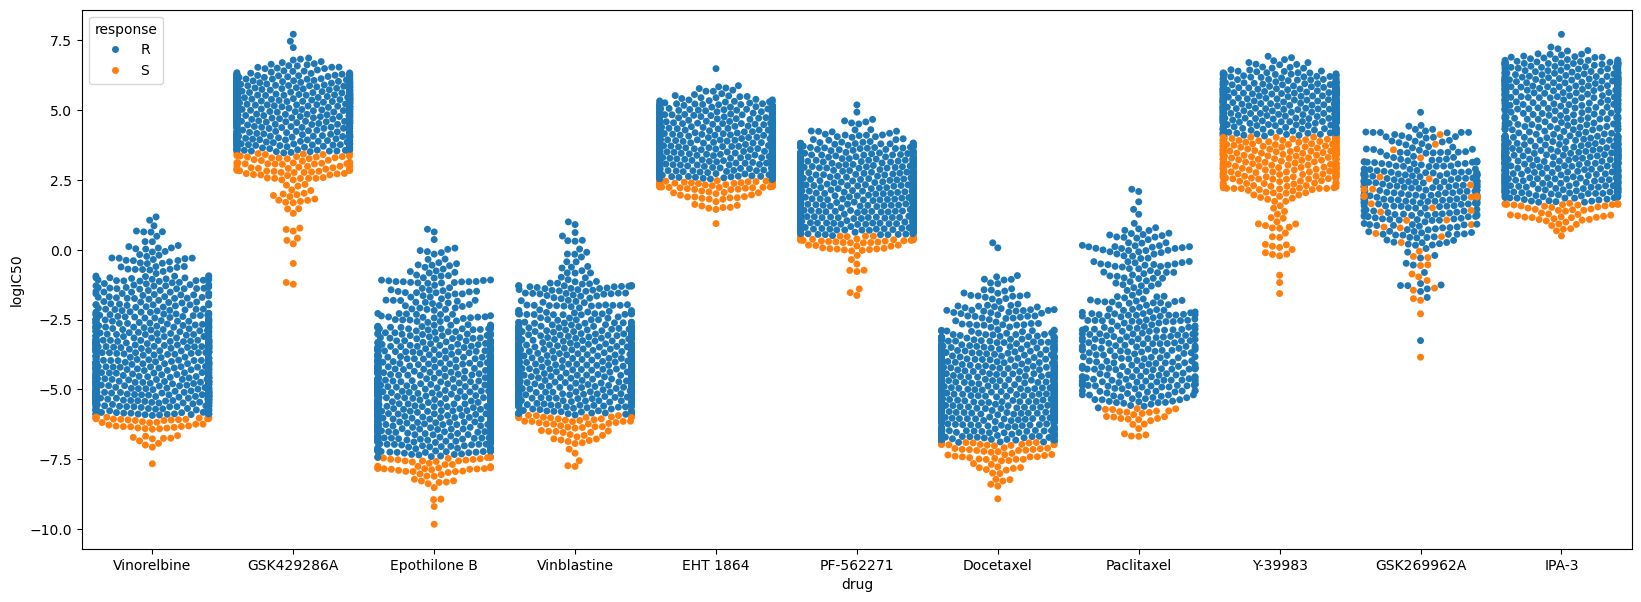

In [13]:
# plot distribution of resistant and sensitive samples (CYTOi)

plt.figure(figsize=(20,7))
sns.swarmplot(x="drug", y="logIC50", hue="response",data=dfs_CYTOi)

## 1.4. DNA_REPi drugs 

In [14]:
# DNA_REPi drugs

drugs = list(set(DNA_REPi_drugs))
dfs_DNA_REPi = []
for drug in drugs:
    try:
        df = pd.read_csv(tmp_dir+"GDSC_response."+drug+".tsv",sep = "\t")
        dfs_DNA_REPi.append(df)
    except:
        print(drug, "not found in GDSC", file = sys.stderr)
dfs_DNA_REPi = pd.concat(dfs_DNA_REPi)
dfs_DNA_REPi.loc[:,"logIC50"] = dfs_DNA_REPi["logIC50"].apply(np.float64)
dfs_DNA_REPi.head()

,sample_name,response,logIC50,drug
0,683665,R,-4.191803,SN-38
1,683667,R,-4.146043,SN-38
2,684052,S,-7.188977,SN-38
3,684055,S,-6.840918,SN-38
4,684057,R,-4.863604,SN-38


<Axes: xlabel='drug', ylabel='logIC50'>

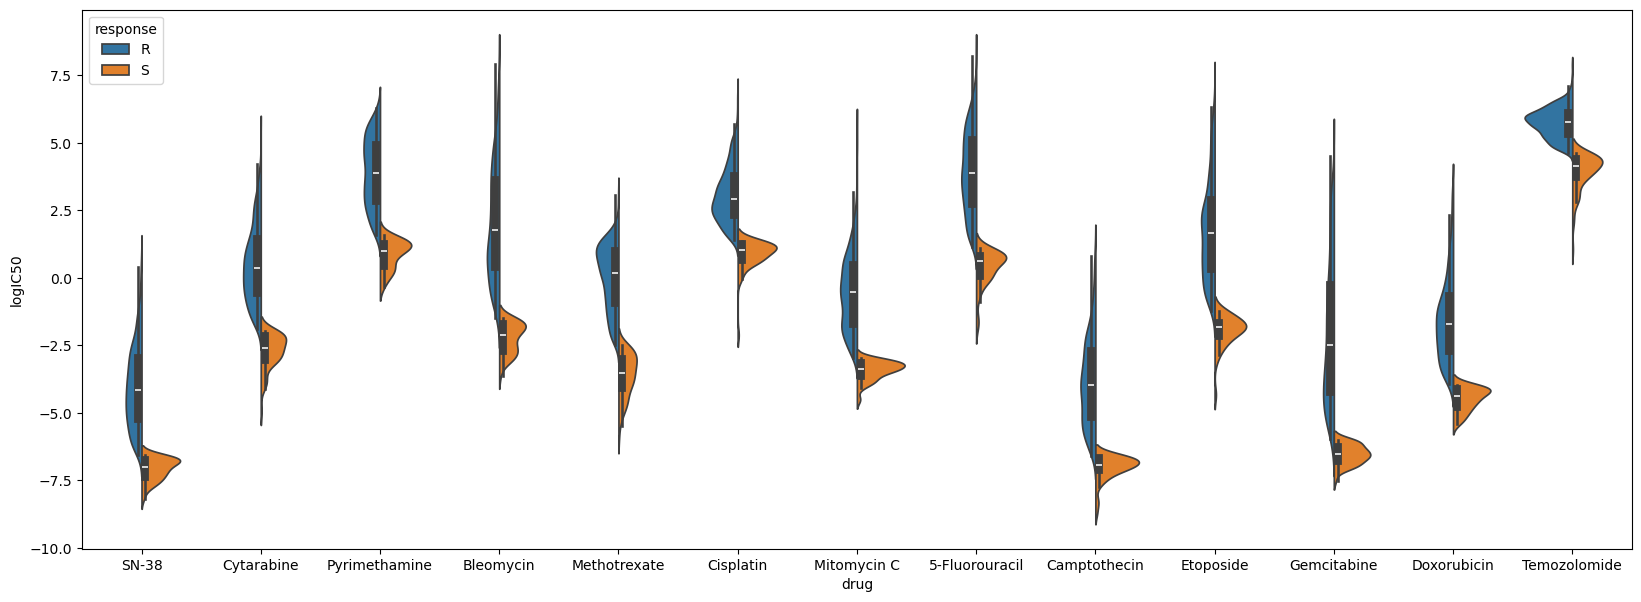

In [15]:
# plot distribution of resistant and sensitive samples (DNA_REPi)

dfs_DNA_REPi = dfs_DNA_REPi.reset_index(drop=True)
plt.figure(figsize=(20,7))
sns.violinplot(x="drug", y="logIC50", hue="response",data=dfs_DNA_REPi,split=True)

<Axes: xlabel='drug', ylabel='logIC50'>

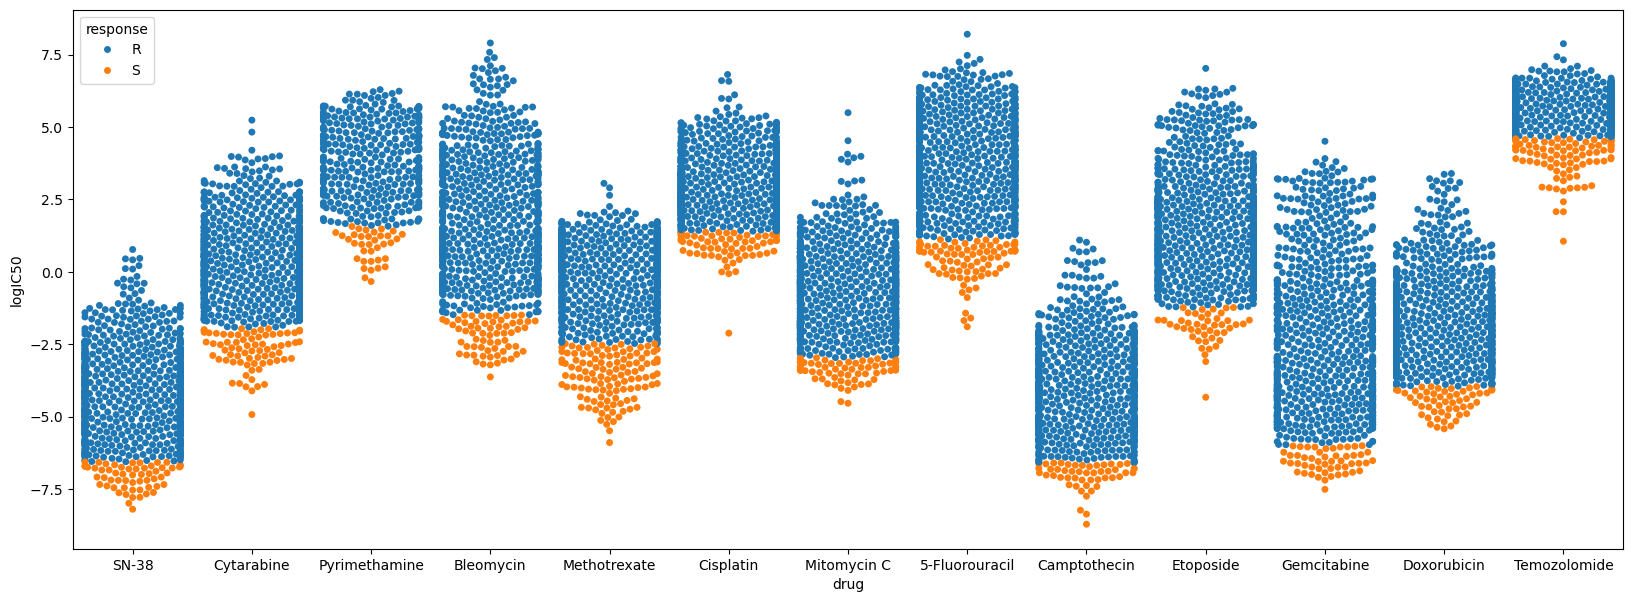

In [16]:
# plot distribution of resistant and sensitive samples (DNA_REPi)

plt.figure(figsize=(20,7))
sns.swarmplot(x="drug", y="logIC50", hue="response",data=dfs_DNA_REPi)

## GDSC logIC50

In [17]:

for d1,d2 in combinations(["Cetuximab", "Erlotinib", "Lapatinib", "Gefitinib", "Afatinib"], r=2):
    r1 = pd.read_csv(root_dir + "response/"+"GDSC"+"_response."+d1+".tsv",sep = "\t", index_col = 0)
    r2 = pd.read_csv(root_dir + "response/"+"GDSC"+"_response."+d2+".tsv",sep = "\t", index_col = 0)
    shared_samples = set(r1.index.values).intersection(set(r2.index.values))
    ic50_1 = r1.loc[shared_samples,["logIC50"]]
    ic50_1.columns = [d1]
    ic50_2 = r2.loc[shared_samples,["logIC50"]]
    ic50_2.columns = [d2]
    df = pd.concat([ic50_2,ic50_1], axis =1)
    r = df.corr().iloc[0,1]
    df.plot(kind ="scatter", x = d1, y = d2, title="logIC50")
    print("GDSC",d1, d2,"matching samples", len(shared_samples), "pearson r", round(df.corr().iloc[0,1],3))

NameError: name 'combinations' is not defined